In [1]:
import pandas as pd
import csv
from loader import *
from pair_finder import *
import time
from random import seed
import keyboard
from random import seed
from random import randint
import math

In [2]:
ratings_path_s = "DATA\\ratings_100users_shuffled.csv"
ratings_path = "DATA\\ratings.csv"
movies_path =  "DATA\\movies.csv"

MinScore = 4
MaxCombo = 4
MinConfidence = 0.5
MinLift = -1
MaxLift = -1
MinFrequency = 0.1
#ratings_stream = createRatingsStream(ratings_path_s, MinScore)
userBaskets= CreateMovieBaskets(ratings_path, MinScore)
movies_df = ReadMovies(movies_path)

In [3]:
combos = myApriori(userBaskets, MinFrequency, MaxCombo)
rules = generate_all_rules(combos, MinConfidence, MinLift, MaxLift)

1 ---------------------> 121
2 ---------------------> 410
3 ---------------------> 290
4 ---------------------> 42


In [4]:
rules.loc[rules['lift'] < 0]

,itemset,rule,hypothesis,conclusion,frequency,confidence,lift,interest,rule_id


In [5]:
import matplotlib.pyplot as plt
import numpy as np

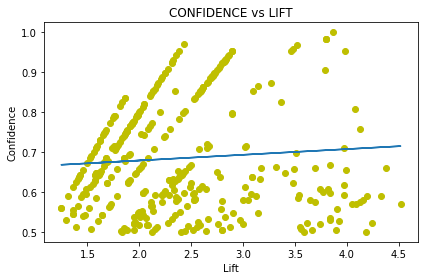

In [6]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit) 
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence') 
plt.title('CONFIDENCE vs LIFT')
plt.tight_layout()
plt.show()

In [14]:
import draw_rules_graph as dr

In [13]:
rules.head()

,itemset,rule,hypothesis,conclusion,frequency,confidence,lift,interest,rule_id
0,"[260, 2571, 2858]","[260, 2571]-->[2858]","[260, 2571]",[2858],0.100000,0.516949,2.074599,-0.149180,1
1,"[260, 2571, 2858]","[260, 2858]-->[2571]","[260, 2858]",[2571],0.100000,0.743902,2.044056,-0.263934,2
2,"[260, 2571, 2858]","[2571, 2858]-->[260]","[2571, 2858]",[260],0.100000,0.622449,1.889024,-0.229508,3
3,"[1198, 1210, 1291]","[1210, 1291]-->[1198]","[1210, 1291]",[1198],0.101639,0.873239,3.267951,-0.165574,4
4,"[1198, 1210, 1291]","[1291]-->[1198, 1210]",[1291],"[1198, 1210]",0.101639,0.590476,4.188261,-0.039344,5


In [15]:
dr.draw_graph(rules,50, 0)

KeyError: 'rule ID'